Presentado por: Diego Quisi

# Entornos de soporte al desarrollo de simulaciones: Simpy - Parte 2


## Generacion de graficar de atencion. 

En base a la simulacion anterior generar una grafica de los autos atendidos.

In [15]:
import simpy
import random
import matplotlib.pyplot as pp

%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 10 
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 3
# Tiempo de simulación
TIEMPO_SIMULACION = 27

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice
        yield self.env.timeout(random.randint(TIEMPO_LAVADO-5, TIEMPO_LAVADO+5))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))

       
        tiempo[nombre]=env.now
        
    
def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(5):
        env.process(llegada_vehiculo(env, 'Vehiculo-%d'%(i+1),lavanderia))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        env.process(llegada_vehiculo(env,'Vehiculo-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)


print("Diccionario timepo :")
print(tiempo)


Lavanderia UPS
Llega vehiculo: Vehiculo-1 a la hora 0.00.
Llega vehiculo: Vehiculo-2 a la hora 0.00.
Llega vehiculo: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-4 a la hora 0.00.
Llega vehiculo: Vehiculo-5 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-1 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-2 a la hora 0.00.
Entra vehiculo a lavarse: Vehiculo-3 a la hora 0.00.
Llega vehiculo: Vehiculo-6 a la hora 2.00.
Removido  {76%} suciedad vehiculo => Vehiculo-3 
Llega vehiculo: Vehiculo-7 a la hora 7.00.
Vehiculo [Vehiculo-3] lavado a las 7.00.
Entra vehiculo a lavarse: Vehiculo-4 a la hora 7.00.
Llega vehiculo: Vehiculo-8 a la hora 10.00.
Llega vehiculo: Vehiculo-9 a la hora 11.00.
Removido  {65%} suciedad vehiculo => Vehiculo-1 
Removido  {75%} suciedad vehiculo => Vehiculo-2 
Vehiculo [Vehiculo-1] lavado a las 12.00.
Vehiculo [Vehiculo-2] lavado a las 12.00.
Entra vehiculo a lavarse: Vehiculo-5 a la hora 12.00.
Entra vehiculo a lavarse: Vehiculo-6 a la hora 12.00.
Remo

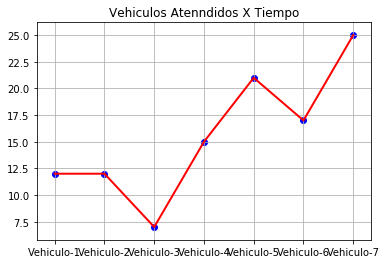

In [16]:
# Generamos la grafica
datos=sorted(tiempo.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Vehiculos Atenndidos X Tiempo")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

## Paremetrizando la simulacion

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 20 minutos
    * Automóvil: 7 minutos
    * Furgoneta: 12 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Realice una gráfica de la simulación con 3 máquinas de lavado

Lavanderia UPS
Llega vehiculo: Bus-1 a la hora 0.00.
Llega vehiculo: Automovil-1 a la hora 0.00.
Llega vehiculo: Furgoneta-1 a la hora 0.00.
Llega vehiculo: Bus-2 a la hora 0.00.
Llega vehiculo: Automovil-2 a la hora 0.00.
Llega vehiculo: Furgoneta-2 a la hora 0.00.
Se traslada vehiculo: Bus-1 a la hora 0.00.
Se traslada vehiculo: Automovil-1 a la hora 0.00.
Se traslada vehiculo: Furgoneta-1 a la hora 0.00.
Entra vehiculo a lavarse: Automovil-1 a la hora 1.00.
Entra vehiculo a lavarse: Furgoneta-1 a la hora 2.00.
Entra vehiculo a lavarse: Bus-1 a la hora 4.00.
68
Llega vehiculo: Automovil-3 a la hora 7.00.
Removido  {87%} suciedad vehiculo => Automovil-1 
Vehiculo [Automovil-1] lavado a las 8.00.
Se traslada vehiculo: Bus-2 a la hora 8.00.
Entra vehiculo a lavarse: Bus-2 a la hora 12.00.
Removido  {67%} suciedad vehiculo => Furgoneta-1 
Vehiculo [Furgoneta-1] lavado a las 14.00.
Se traslada vehiculo: Automovil-2 a la hora 14.00.
Entra vehiculo a lavarse: Automovil-2 a la hora 15.00.
49

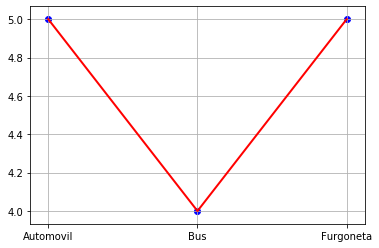

In [40]:
import simpy
import random
import matplotlib.pyplot as pp

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en trasladarse un vehiculo (minutos)
TRASLADO_BUS = 4
TRASLADO_AUTOMOVIL= 1
TRASLADO_FURGONETA= 2
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_BUS = 20
TIEMPO_AUTOMOVIL= 7
TIEMPO_FURGONETA= 12
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 10
# Tiempo de simulación
TIEMPO_SIMULACION = 100

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
tiempo={}

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas,tiempo_bus,tiempo_automovil,
                 tiempo_furgoneta,traslado_bus,traslado_automovil,traslado_furgoneta):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_bus = tiempo_bus
        self.tiempo_automovil = tiempo_automovil
        self.tiempo_furgoneta = tiempo_furgoneta
        self.traslado_bus = traslado_bus
        self.traslado_automovil = traslado_automovil
        self.traslado_furgoneta = traslado_furgoneta
        
    def lavar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TIEMPO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TIEMPO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TIEMPO_FURGONETA)
        #Solo agregamos al diccionario al momento que termina de lavar el vehiculo.
        k=automotor[0]
        if k in tiempo:
            tiempo[k]=tiempo[k]+1
        else:
            tiempo[k]=1
            
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' %(random.randint(30,90), vehiculo))
        
    def trasladar_vehiculo(self, vehiculo):
        automotor=vehiculo.split('-')
        if(automotor[0] == 'Bus'):
            yield self.env.timeout(TRASLADO_BUS)
        if(automotor[0] == 'Automovil'):
            yield self.env.timeout(TRASLADO_AUTOMOVIL)
        if(automotor[0] == 'Furgoneta'):
            yield self.env.timeout(TRASLADO_FURGONETA)
       
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        yield maquina
        #Indicamos que el vehiculo se esta trasladando para ser lavado
        print('Se traslada vehiculo: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del vehiculo
        yield env.process(lavanderia.trasladar_vehiculo(nombre))
        # Indicamos que vehiculo entra a la lavanderia
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (nombre, env.now))
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))  
        
def ejecutar_simulacion(env, num_maquinas, tiempo_bus,tiempo_automovil,
                        tiempo_furgoneta,traslado_bus,traslado_automovil,
                        traslado_furgoneta, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_bus,tiempo_automovil,
                          tiempo_furgoneta,traslado_bus,traslado_automovil,
                          traslado_furgoneta)
    # Creamos 5 llegadas de vehiculos iniciales
    for i in range(2):
        env.process(llegada_vehiculo(env, 'Bus-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Automovil-%d'%(i+1),lavanderia))
        env.process(llegada_vehiculo(env, 'Furgoneta-%d'%(i+1),lavanderia))
        
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(intervalo-3, intervalo+3))
        i+=1
        # Mientras se lavan los vehiculos generamos mas vehiculos
        rnd = random.randint(1,100)
        if rnd <= 20: # Bus 20%, Furgoneta 30% y Automovil 50%
            env.process(llegada_vehiculo(env,'Bus-%d'%(i+1),lavanderia))
        elif rnd <= 50:
            env.process(llegada_vehiculo(env,'Furgoneta-%d'%(i+1),lavanderia))
        else:
            env.process(llegada_vehiculo(env,'Automovil-%d'%(i+1),lavanderia))

print('Lavanderia UPS')

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_BUS,TIEMPO_AUTOMOVIL,
                                TIEMPO_FURGONETA,TRASLADO_BUS,TRASLADO_AUTOMOVIL,
                                TRASLADO_FURGONETA, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

# Generamos la grafica
datos=sorted(tiempo.items())
x, y =zip(*datos)
pp.plot(x,y,linewidth=2,color='red')
pp.scatter(x,y,color='blue')
pp.grid(True)
pp.show()

## Práctica  Sympy 2

En base a la simulacion, generar una simulacion lo mas apegado a la realidad del Covid-19, para ello obtener informacion del numero de consultorios y camas disponibles en un hospital del Ecuador. Parametrizar la simulacion para ingresar el numero de pacientes, el numero de consultorios y el numero de camas y algun otro parametro que considere oportuno.

Finalmente generar las siguientes metricas :
- Tiempo de espera promedio para cada sala.
- Tiempo promedio total que requiere un paciente para ser atendido desde cero.
- Cuántos pacientes se atendieron.
- Cuántos pacientes se quedaron sin atender y fallecieron.


# LIBRERIAS

In [1]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np

%matplotlib inline

# DESARROLLO

Simulacion Estimado de COVID 19
al paciente:  0  se le asigna una cama en el hospital Teofilo Davila
al paciente:  1  se le asigna una cama en el hospital Teofilo Davila
al paciente:  2  se le asigna una cama en el hospital Teofilo Davila
al paciente:  3  se le asigna una cama en el hospital Teofilo Davila
al paciente:  4  se le asigna una cama en el hospital Teofilo Davila
al paciente:  5  se le asigna una cama en el hospital Teofilo Davila
al paciente:  6  se le asigna una cama en el hospital Teofilo Davila
al paciente:  7  se le asigna una cama en el hospital Teofilo Davila
al paciente:  8  se le asigna una cama en el hospital Teofilo Davila
al paciente:  9  se le asigna una cama en el hospital Teofilo Davila
al paciente:  10  se le asigna una cama en el hospital Teofilo Davila
al paciente:  11  se le asigna una cama en el hospital Teofilo Davila
al paciente:  12  se le asigna una cama en el hospital Teofilo Davila
al paciente:  13  se le asigna una cama en el hospital Teofilo Davil

Este paciente  259 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  260 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  261 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  262 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  263 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  264 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  265 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  266 entro al hospital  Teo

Este paciente  474 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  475 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  476 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  477 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  478 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  479 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  480 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  481 entro al hospital  Teo

Este paciente  739 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  740 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  741 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  742 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  743 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  744 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  745 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  746 entro al hospital  Teo

Este paciente  975 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  976 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  977 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  978 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  979 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  980 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  981 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  982 entro al hospital  Teo

Este paciente  1259 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1260 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1261 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1262 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1263 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1264 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1265 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1266 entro al hospi

Este paciente  1530 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1531 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1532 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1533 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1534 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1535 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1536 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1537 entro al hospi

Este paciente  1745 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1746 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1747 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1748 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1749 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1750 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1751 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1752 entro al hospi

Este paciente  1940 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1941 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1942 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1943 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1944 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1945 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1946 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  1947 entro al hospi

Este paciente  2212 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  2213 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  2214 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  2215 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  2216 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  2217 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  2218 entro al hospital  Teofilo Davila se mantuvo en espera  1  dias pero fallecio por falta de consultorio en el hospital
Este paciente  2219 entro al hospi

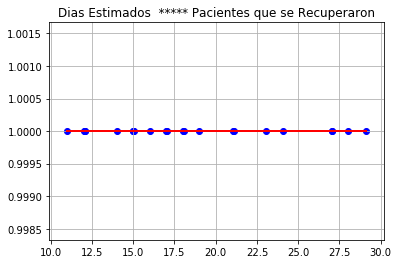

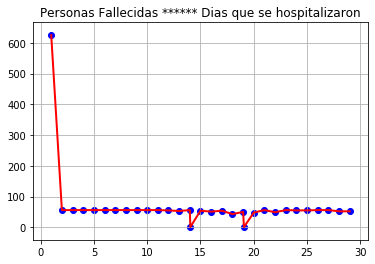

In [2]:
# DATOS PROVINCIA DEL ORO HOSPITAL TOEFILO DAVILA
# NUMERO DE CAMAS PARA EL COVID
NUMERO_CAMAS_COVID=193
# NUMERO DE CONSULTORIOS DEL HOSPITAL
NUMERO_CONSULTORIOS = 16
# CANTIDAD DE INFECTADOS EN LA PROVINCIA DEL ORO
INFECTADOS = 673
# TASA DE CRECIMIENTO CORRESPONDE A LA MEDIA
TASA_CRECIMIENTO = 56
# TIEMPO ESTIMADO DE LA CONSULTA DEL PASIENTE
TIEMPO_ESTIMADO_CONSULTA = 0.0105 #15 minutos 
# DIAS DE INTERNADO EN CASO DE TENER COVID
DIAS_INTERNADO_PACIENTE = 14
# DIAS DE SIMULACION PARA EL ANALISIS
DIAS_SIMULACION = 30

recuperados={}
fallecidosP={}
tiempoConsultas=[]
tiemposEsperaConsulta=[]
pacientesSinAtender=[]
pacietnesAtendidos=[]

class Hospital(object):
    #constructor
    def __init__(self, env, num_cama,num_consultorios, name):
            self.env = env
            self.num_cama = num_cama
            self.num_consultorios=num_consultorios
            self.camas = simpy.Resource(env, num_cama)
            self.consultorios=simpy.Resource(env, num_consultorios)
            self.name = name
            
            
            
# ENVIAMOS A UN PASIENTE A UN CONSULTORIO EN UN TIEMPO ESTIMADO         
    def pasaalconsultorio(self,paciente):
        tconsu=random.uniform(TIEMPO_ESTIMADO_CONSULTA-0.005, TIEMPO_ESTIMADO_CONSULTA+0.005)
        yield self.env.timeout(tconsu)
        print('el paciente ingreso al cosultorio en un tiempo estimado de: ', tconsu)
        tiempoConsultas.append(tconsu)
        
#ASIGNAMOS A UN PASIENTE QUE SE LE DETECTO COVID A UNA CAMA
        
    def asignarcama(self, paciente):
        yield self.env.timeout(random.randint(DIAS_INTERNADO_PACIENTE-5, DIAS_INTERNADO_PACIENTE+5))
        print("Este paciente ", paciente, " entro en un tiempo estimado de: ", self.env.now, "al hospital Teofilo Davila", self.name)

        
        
# SIMULAMOS EL PROCESO EN QUE EL PASIENTE LLEGA AL HOSPITAL Y ES ATENDIDO, Y POSTERIORMENTE INTERNADO O SI NO 
# LOGRO ENTRA A UNA CONSULTA
def simular(env, hospital, paciente):
    arrive = env.now
    with hospital.consultorios.request() as consultorio:
        dias_esperando_consulta=random.randint(1,1)
        tiemposEsperaConsulta.append(dias_esperando_consulta)
        requerimiento2 = yield consultorio | env.timeout(dias_esperando_consulta)
        wait2 = env.now - arrive
        if consultorio in requerimiento2:
            print("al paciente: ", paciente, " se le asigna una cama en el hospital" , hospital.name)
            yield env.process(hospital.pasaalconsultorio(paciente))
            estado = random.randint(1,100)
            pacietnesAtendidos.append(1)
    #SI SE DETECTA COVID ES PUESTO EN INTERNADO Y SE LE ASIGNA UNA CAMA
            if(estado < 40):
                with hospital.camas.request() as cama:
                    arrive2 = env.now
                    dias_esperando = random.randint(1,5) #Numero de dias maximo que puede esperar sin ser asignado a una cama dentro del hospital
                    requerimiento = yield cama | env.timeout(dias_esperando) #Asignar un tiempo de espera
                    wait = env.now - arrive2
                    if cama in requerimiento:
                        print("Al paciente: ", paciente, " se le asigno una cama ", " en el hospital " , hospital.name)
                        yield env.process(hospital.asignarcama(paciente))
                        estado = random.randint(1,100)
                        if (estado < 8) :
    #ESTIMADO PORSENTAJE DE FALLECIDOS POR NO ENTRAR A CONSULTA O FALTA DE CAMAS PARA SE INTERNADO
                            fallecidosP[env.now] = fallecidosP[env.now] + 1 if env.now in fallecidosP else  1
                        else:
                            recuperados[env.now] = recuperados[env.now] + 1 if env.now in recuperados else 1
                    else:
                        print("El paciente " , paciente, "fue internado en el hospital", hospital.name, " y espero ", wait , " dias pero fallecio por falta de camas en el hospital")
                        fallecidosP[env.now] = fallecidosP[env.now] + 1 if env.now in fallecidosP else  1
            else :
                print("No se detecto COVID al paciente : ", paciente, " en el hospital ", hospital.name )
        else:
            print("Este paciente " , paciente, "entro al hospital ", hospital.name, "se mantuvo en espera ", wait2 , " dias pero fallecio por falta de consultorio en el hospital")
            pacientesSinAtender.append(1)
            fallecidosP[env.now] = fallecidosP[env.now] + 1 if env.now in fallecidosP else  1
            
            
            
#ESTIMADO DE LOS PASIENTES QUE VAN INGRESANDO AL HOSPITAL POR COVID            
def ejecutar(env, tasa_crecimiento, infectados):
    hospitalA = Hospital(env, NUMERO_CAMAS_COVID,NUMERO_CONSULTORIOS, "Teofilo Davila")
    for i in range(infectados):
        hospitalpaciente(env, hospitalA, i)
    paciente = infectados
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            paciente += 1
            hospitalpaciente(env, hospitalA, paciente)            
def hospitalpaciente(env, hospitalA, paciente):
    hosp_esc = 1
    if (hosp_esc == 1):
        env.process(simular(env, hospitalA, paciente))
        
# GENERAMOS LOS RESULTADOS DE LA SIMULACION EN LA GRAFICA BASADOS EN EL HOSPITAL DEL ORO

print("Simulacion Estimado de COVID 19")
env=simpy.Environment()
env.process(ejecutar(env,TASA_CRECIMIENTO, INFECTADOS))
env.run(until=DIAS_SIMULACION)

print("Estado de la consulta de los pacientes :")
print("Pacientes que se Recuperaron--",recuperados)
print("Pacientes que fallecieron--",fallecidosP)


datos=sorted(recuperados.items()) # Ordenamos los datos
x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
pp.title("Dias Estimados  ***** Pacientes que se Recuperaron")
pp.grid(True) #Generamos una cuadricula
pp.show() #Mostramos el grafico

if (fallecidosP):
    datos=sorted(fallecidosP.items()) # Ordenamos los datos
    x, y =zip(*datos) # Obtener x(tiempo - clave) y el y(Numero de vehiculos atendidos - valor)
    pp.plot(x,y,linewidth=2,color='red') #Dibujamos las lineas
    pp.scatter(x,y,color='blue') # Dibujamos los puntos (x,y)
    pp.title("Personas Fallecidas ****** Dias que se hospitalizaron")
    pp.grid(True) #Generamos una cuadricula
    pp.show() #Mostramos el grafico

# RESULTADOS

In [3]:
print("Resultados de la Simulacion del hospital Teofilo Davila Provincia del Oro")
print("Tiempo de espera promedio 15 minutos estimado de",sum(tiempoConsultas)/len(tiempoConsultas))
print("Tiempo promedio que se demora el paciente en ser atendido",sum(tiemposEsperaConsulta)/len(tiemposEsperaConsulta))
print("Pacientes que el hospital logro atender:",sum(pacietnesAtendidos))
print("Pacientes que se quedaron sin atender y fallecieron en base a la simulacion dieron un total de :",sum(pacientesSinAtender))

Resultados de la Simulacion del hospital Teofilo Davila Provincia del Oro
Tiempo de espera promedio 15 minutos estimado de 0.01058474290949466
Tiempo promedio que se demora el paciente en ser atendido 1.0
Pacientes que el hospital logro atender: 109
Pacientes que se quedaron sin atender y fallecieron en base a la simulacion dieron un total de : 2136


## Referencias
[1] Matloff, N. (2008). Introduction to Discrete-Event Simulation and the SimPy Language.

[2] Team Simpy (2017). SimPy Documentation, Release 3.0.10, 2017. URL: https://media.readthedocs.org/pdf/simpy/latest/simpy.pdf 